In [3]:
! pip install wordcloud --user


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [4]:
import os, pandas as pd
import urllib
import json
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
nlp = spacy.load("en_core_web_lg")

# Import the Data

In [28]:
# Possible YouTube videos that we will look at for Analysis

video_id = "Lwx-2R9swDg" # Be All You Can Be - U.S. Army's new brand trailer - U.S. Army
#video_id = "-ZMzfihqOkQ" # What Army Snipers Go Through At Sniper School - insider business
#video_id = "nV8UZJNBY6Y" # Adele - The Final Carpool Karaoke
#video_id = "kLMMxgtxQ1Y" # GOP- Beat Biden AI-generated images

In [29]:
comments_df = pd.read_csv("video_comments_"+video_id+".csv", index_col=0)

# Analyze the Data
- sentiment analysis and plot of counts over time
- wordmap, after removing stopwords

In [30]:
sia= SentimentIntensityAnalyzer()

In [31]:
comments_df['sentiment'] = comments_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [32]:
comments_df['sentiment'] = comments_df['comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
comments_df['published_at'] = pd.to_datetime(comments_df['published_at'])
comments_df['day_month'] = comments_df['published_at'].dt.month.astype(str) +"_"+comments_df['published_at'].dt.day.astype(str)
comments_df['pos_sentiment'] = comments_df['sentiment'].apply(lambda x : 1 if x>0.1 else 0)
comments_df['neg_sentiment'] = comments_df['sentiment'].apply(lambda x : 1 if x<-0.1 else 0)

<AxesSubplot: xlabel='sentiment', ylabel='Count'>

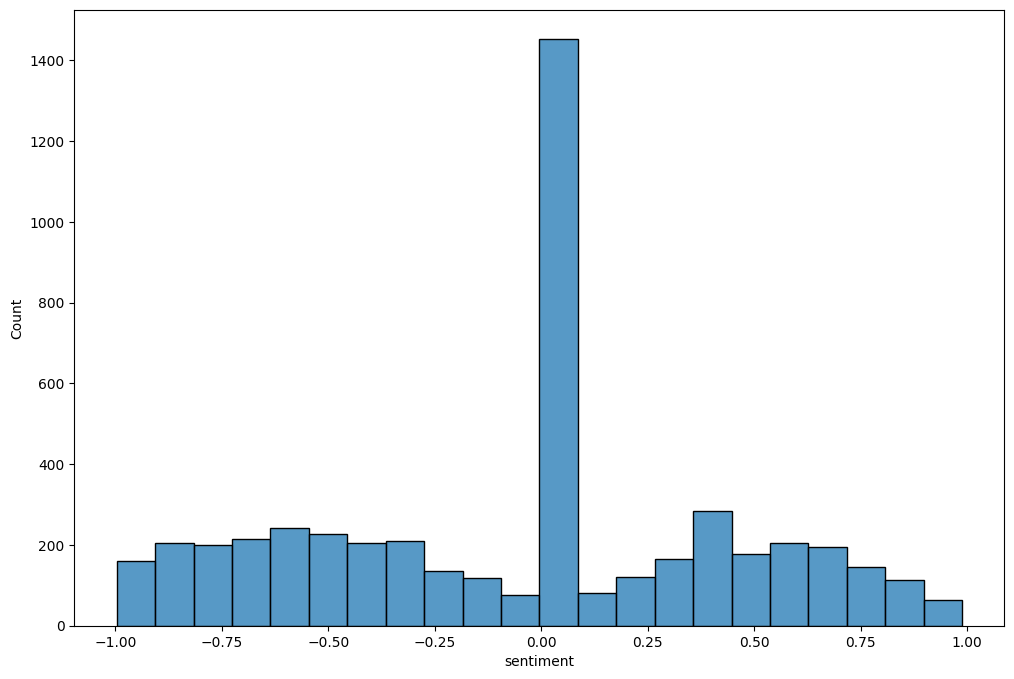

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(data=comments_df, x='sentiment')

In [34]:
text = nlp(" ".join(comments_df['comment'].values))

In [35]:
lemmas = [token.lemma_.strip().lower() for token in text if 
                ( not (token.is_stop) and (token.is_alpha) and token.__len__() >2 )
                ]

In [36]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(" ".join(lemmas))

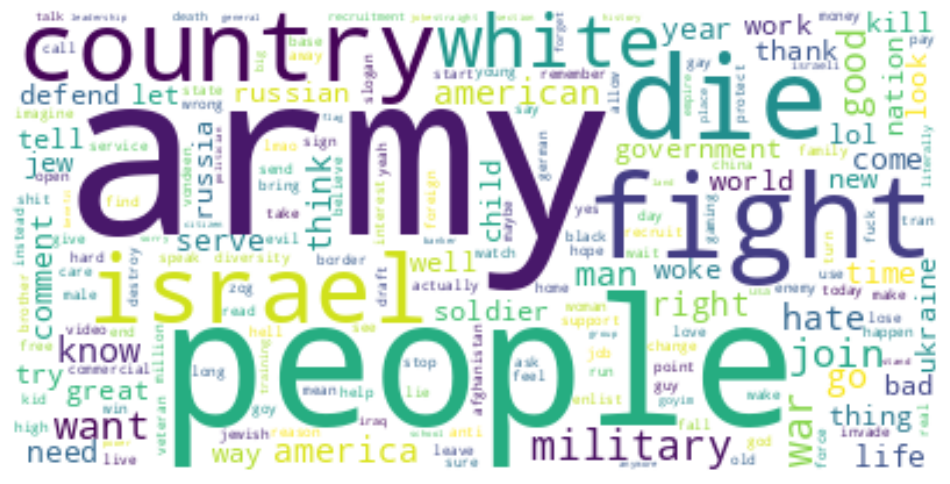

In [37]:
plt.figure(figsize=(12,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
c = Counter(lemmas)
c.most_common(10)

[('army', 677),
 ('people', 590),
 ('fight', 531),
 ('die', 530),
 ('country', 493),
 ('israel', 438),
 ('white', 421),
 ('military', 381),
 ('war', 367),
 ('like', 356)]

In [41]:
comments

,id,comment,author,author_channel,like_count,published_at,coversation_id,sentiment,day_month,pos_sentiment,neg_sentiment
0,Ugw9IBQKKfqyR4UCg9R4AaABAg,They turn off the comments on Emma’s video wha...,Seanisthebest233,UCRIMpyjXFMcDt6erwu55N5w,0,2023-04-25 19:23:20+00:00,Ugw9IBQKKfqyR4UCg9R4AaABAg,-0.5267,4_25,0,1
1,Ugw40j7JeT-B8RKhNkV4AaABAg,At least it's not anime this time,Shyper17,UCgYuFDCI9YHEgwxN-ZNMo3w,0,2023-04-25 16:55:01+00:00,Ugw40j7JeT-B8RKhNkV4AaABAg,0.0000,4_25,0,0
2,UgyLzRywyepsvpOxlER4AaABAg,Globohomo can rot in Hell,Solo Knight,UCVof4fUMonXoAx7J_hplBwQ,0,2023-04-25 15:05:48+00:00,UgyLzRywyepsvpOxlER4AaABAg,-0.6808,4_25,0,1
3,Ugzt8Ay5Z1lKN7Tgmll4AaABAg,"As quoted by the US Army and Marine Corp - ""((...",C. Truth,UCaotpXNbW8WgTP6KBPRl2tQ,1,2023-04-25 04:16:52+00:00,Ugzt8Ay5Z1lKN7Tgmll4AaABAg,0.0000,4_25,0,0
4,Ugzt8Ay5Z1lKN7Tgmll4AaABAg.9ov0DcKOU2J9ovYRU0F_nH,too bad that guy admitted in the same video th...,Brandon King,UCc-1oVw6I6XmUAnXDSxSFSA,0,2023-04-25 09:15:51+00:00,Ugzt8Ay5Z1lKN7Tgmll4AaABAg,-0.4767,4_25,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,Ugw-29dstXWmSsvCqbJ4AaABAg,God bless USA!!! God bless Ukraine!!! Together...,Виталий Библеев,UCbb-p25dpJWKmvumELSms3Q,4,2023-03-06 14:27:25+00:00,Ugw-29dstXWmSsvCqbJ4AaABAg,0.8741,3_6,1,0
4996,UgzO7I590cnUhRfQx3Z4AaABAg,Amo demais! ❤💙💛💚,Ester,UCHnFdnDyP9nDY7fUyrOf0rw,1,2023-03-06 14:27:05+00:00,UgzO7I590cnUhRfQx3Z4AaABAg,0.0000,3_6,0,0
4997,UgwRg1V55Fp9had3owN4AaABAg,Lies,VVS-Alex,UClL-M508GaBCLcfWKwuE6wA,4,2023-03-06 14:26:54+00:00,UgwRg1V55Fp9had3owN4AaABAg,-0.4215,3_6,0,1
4998,UgwRg1V55Fp9had3owN4AaABAg.9mvMHut9Xix9mvMjn3dEtz,Half of the VVD is dead\n)\nPoka sukhiy. Konye...,Quizmaster China,UCYrImIPbfdhYLtNYVzjQX5A,0,2023-03-06 14:30:50+00:00,UgwRg1V55Fp9had3owN4AaABAg,-0.6486,3_6,0,1


In [49]:
comments_df.to_csv("BI_video_youtube_comments.csv")